In [1]:
from datetime import datetime
from utils import get_pg_engine
import pandas as pd


In [2]:
def build_correlations(start_date = '2019-01-01', end_date = datetime.now().strftime('%Y-%m-%d'), num_stocks = 1000):
    

    assert num_stocks > 20, 'To build an interesting analysis, make sure the number of stocks to use is at least 20'

    start_date_fmt = datetime.strptime(start_date, '%Y-%m-%d')
    end_date_fmt = datetime.strptime(end_date, '%Y-%m-%d')
    diff = end_date_fmt - start_date_fmt
    assert int(diff.days/7) > 12, 'For more meaningful correlations increase the window between the start_date and end_date (at least 12 weeks)'

    engine = get_pg_engine()

    engine.execute("CREATE TABLE IF NOT EXISTS correlations (window_id text, start_date date, end_date date, symbol_a text, symbol_b text, correlation double precision)")

    stocks = pd.read_sql(f'select symbol, sum(volume) as volume \
                       from price \
                       where timestamp between \'{start_date}\' and \'{end_date}\' \
                       group by symbol \
                       order by sum(volume) desc \
                       limit {num_stocks}', engine)
    
    relevant_stocks = ','.join([f"'{stock}'" for stock in stocks['symbol'].tolist()])

    price_data = pd.read_sql(f"select timestamp, symbol, open as price\
                            from price\
                            where \"timestamp\" between \'{start_date}\' and \'{end_date}\'\
                            and symbol in ({relevant_stocks})", engine)

    price_data = price_data.pivot(index='timestamp', columns='symbol', values='price')

    return price_data
       

In [37]:
df = build_correlations()

In [38]:
 = df.isna().apply('mean').sort_values(ascending=False).reset_index().rename(columns={0:'nas'}).query('nas <= 0.65')

In [39]:
df

,symbol,nas
59,GACA.LON,0.644068
60,GACB.LON,0.644068
61,MCT.LON,0.644068
62,JPEL.LON,0.644068
63,ELLA.LON,0.644068
...,...,...
995,CTY.LON,0.508475
996,ANII.LON,0.500000
997,WWH.LON,0.500000
998,CLDN.LON,0.500000


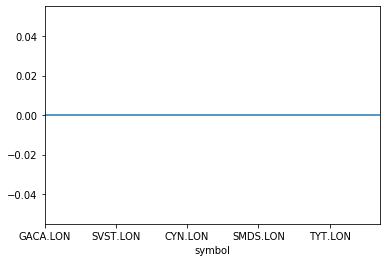

In [34]:
df.isna().apply('mean', axis=1).plot()

In [35]:
df.isna().apply('mean', axis=1)

symbol
GACA.LON    0.0
GACB.LON    0.0
MCT.LON     0.0
JPEL.LON    0.0
ELLA.LON    0.0
           ... 
CTY.LON     0.0
ANII.LON    0.0
WWH.LON     0.0
CLDN.LON    0.0
IEM.LON     0.0
Length: 941, dtype: float64